In [154]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')



In [155]:
df = pd.read_csv('Aquifer_Petrignano.csv')

In [156]:
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# We will drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

# Simplify column names
df.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry']

In [157]:
print('There are {} rows and {} columns in our data'.format(df.shape[0],df.shape[1]))

There are 4199 rows and 6 columns in our data


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  4199 non-null   object 
 1   Rainfall              4199 non-null   float64
 2   Depth_to_Groundwater  4172 non-null   float64
 3   Temperature           4199 non-null   float64
 4   Drainage_Volume       4198 non-null   float64
 5   River_Hydrometry      4199 non-null   float64
dtypes: float64(5), object(1)
memory usage: 197.0+ KB


In [159]:
df.Date = pd.to_datetime(df['Date'])

In [160]:
df.isna().sum()

Date                     0
Rainfall                 0
Depth_to_Groundwater    27
Temperature              0
Drainage_Volume          1
River_Hydrometry         0
dtype: int64

In [161]:
df.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-02-01,0.0,-31.11,2.3,-28785.888,2.5
2,2009-03-01,0.0,-31.07,4.4,-25766.208,2.4
3,2009-04-01,0.0,-31.05,0.8,-27919.296,2.4
4,2009-05-01,0.0,-31.01,-1.9,-29854.656,2.3


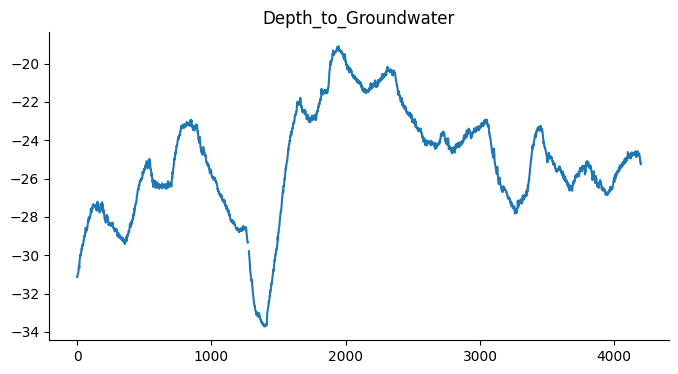

In [162]:
# @title depth_to_groundwater

from matplotlib import pyplot as plt
df['Depth_to_Groundwater'].plot(kind='line', figsize=(8, 4), title='Depth_to_Groundwater')
plt.gca().spines[['top', 'right']].set_visible(False)

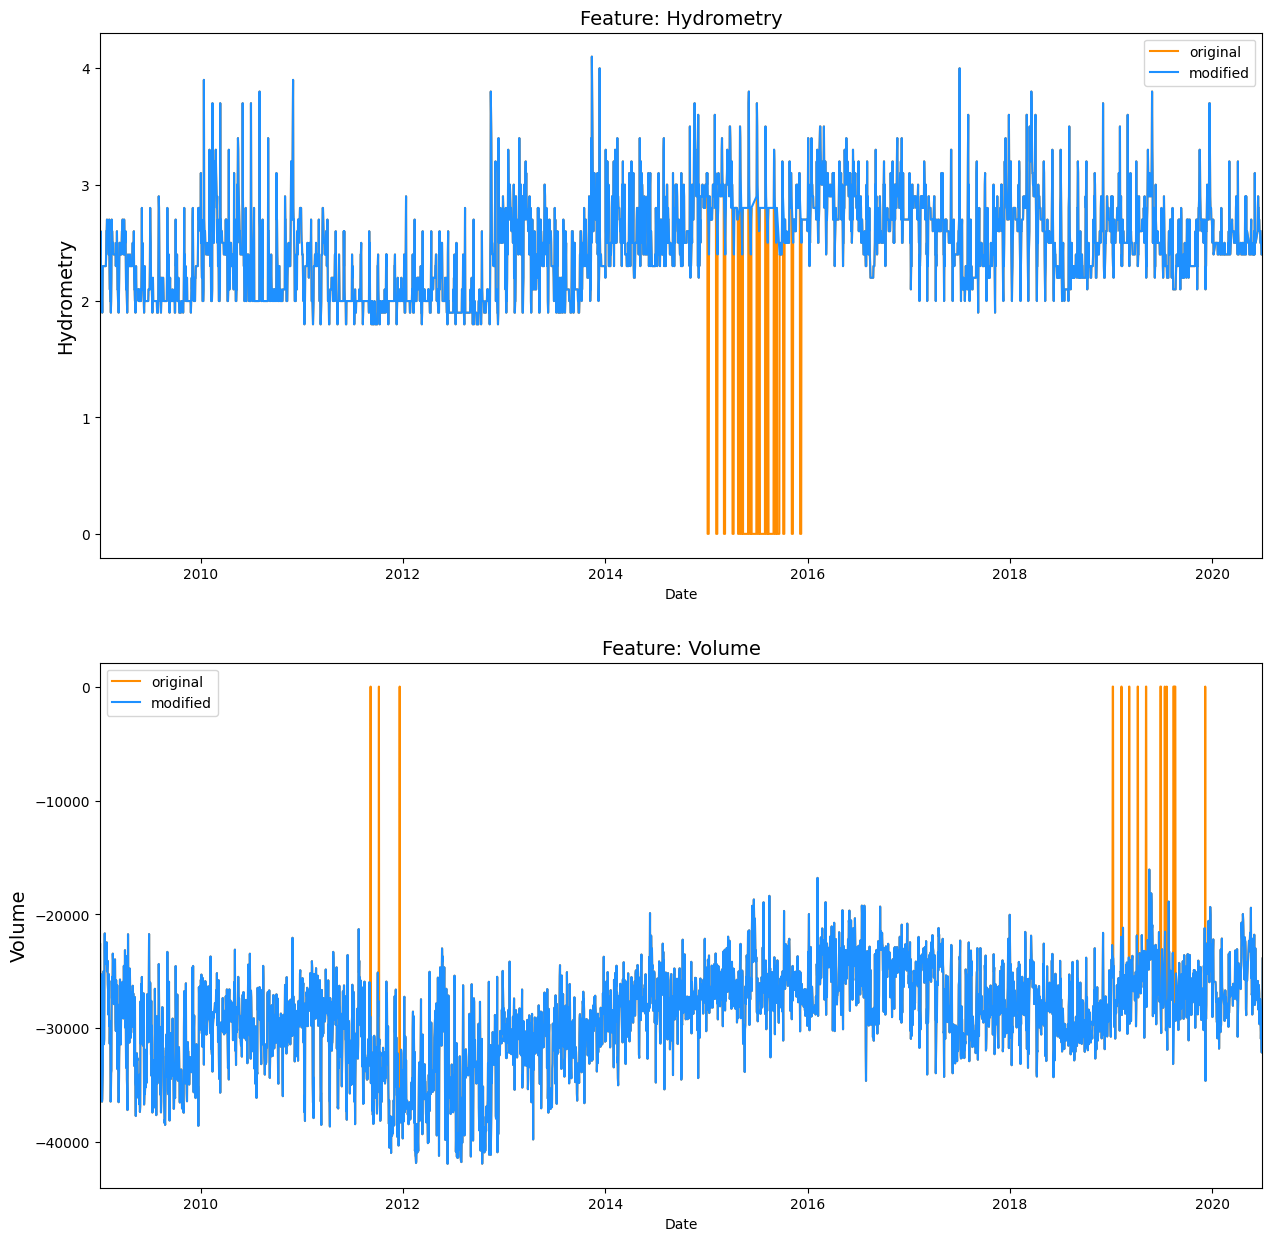

In [163]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
old = df.River_Hydrometry.copy()
df['River_Hydrometry'] = np.where((df.River_Hydrometry == 0),np.nan, df.River_Hydrometry)

sns.lineplot(x=df.Date, y=old.fillna(np.inf), ax=ax[0], color='darkorange', label = 'original')
sns.lineplot(x=df.Date, y=df.River_Hydrometry.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

old = df.Drainage_Volume.copy()
df['Drainage_Volume'] = np.where((df.Drainage_Volume == 0),np.nan, df.Drainage_Volume)

sns.lineplot(x=df.Date, y=old.fillna(np.inf), ax=ax[1], color='darkorange', label = 'original')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'modified')
ax[1].set_title('Feature: Volume', fontsize=14)
ax[1].set_ylabel(ylabel='Volume', fontsize=14)


for i in range(2):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

**Missing Values, how to handle**

*Option 1*: Fill NaN with Outlier or Zero
In this specific example filling the missing value with an outlier value such as np.inf or 0 seems to be very naive. However, using values like -999, is sometimes a good idea.

*Option 2*: Fill NaN with Mean Value
Filling NaNs with the mean value is also not sufficient and naive, and doesn't seems to be a good option.

*Option 3*: Fill NaN with Last Value with .ffill()
Filling NaNs with the last value could be bit better.

*Option 4*: Fill NaN with Linearly Interpolated Value with .interpolate()
Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring value

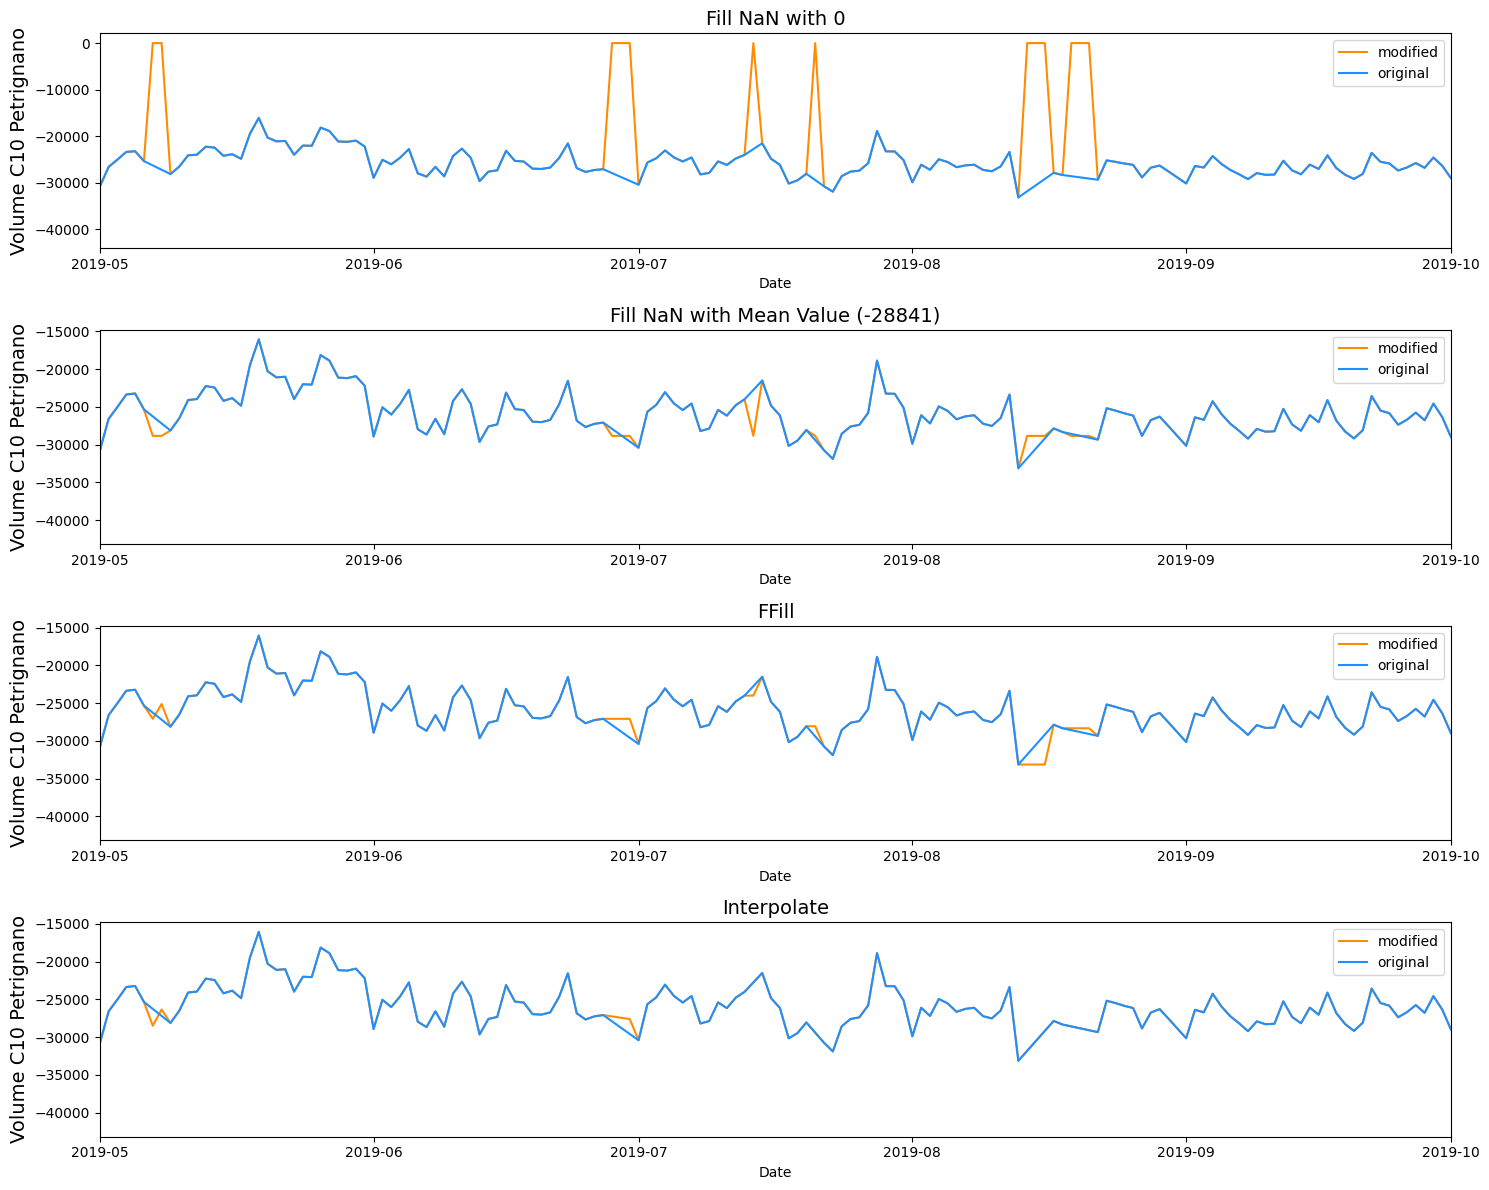

In [164]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_val = df.Drainage_Volume.mean()
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(mean_val), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_val:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df.Date, y=df.Drainage_Volume.ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df.Date, y=df.Drainage_Volume.interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df.Date, y=df.Drainage_Volume.fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
plt.tight_layout()
plt.show()

As we can see, *interpolate* might be the best option in our case.

In [165]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

In [166]:
df['depth_to_groundwater'] = df['depth_to_groundwater'].fillna(df['depth_to_groundwater'].interpolate())
df['drainage_volume'] = df['drainage_volume'].fillna(df['depth_to_groundwater'].interpolate())
df['river_hydrometry'] = df['river_hydrometry'].fillna(df['depth_to_groundwater'].interpolate())


** Smoothing data / Resampling**

Resampling can provide additional information on the data. There are two types of resampling:



*   *Upsampling:* is when the frequency of samples is increased (e.g. days to hours)
*   *Downsampling:* is when the frequency of samples is decreased (e.g. days to weeks)



In our case, we will do some downsampling with the .resample() function (similar to groupby and aggregate as mean).

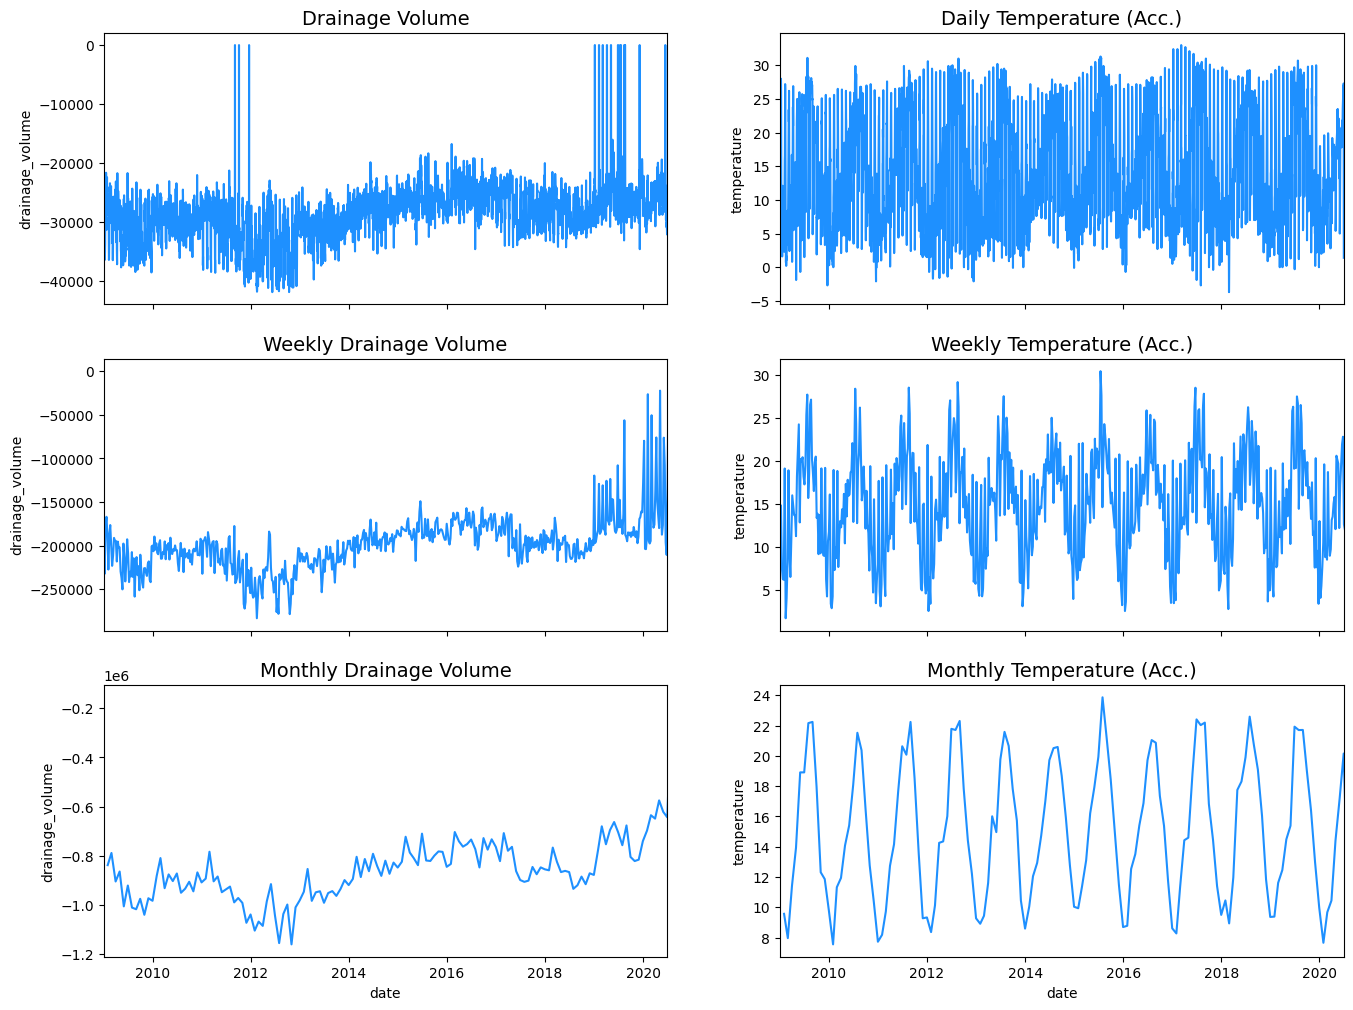

In [167]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(x = df['date'], y = df['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x = resampled_df['date'], y = resampled_df['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

resampled_df = df[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x = resampled_df['date'], y = resampled_df['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x = df['date'], y = df['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(x = resampled_df['date'], y =  resampled_df['temperature'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

resampled_df = df[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(x = resampled_df['date'], y = resampled_df['temperature'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

In [168]:
# As we can see, downsample to weekly could smooth the data and help with analysis
downsample = df[['date',
                 'depth_to_groundwater',
                 'temperature',
                 'drainage_volume',
                 'river_hydrometry',
                 'rainfall'
                ]].resample('7D', on='date').mean().reset_index(drop=False)

df = downsample.copy()

**Stationarity**

Now, time to check the Stationarity.
The check for stationarity can be done via three different approaches:

1.   Visually: plot time series and check for trends or seasonality
2.   Basic statistics: split time series and compare the mean and variance of each partition
3.   Statistical test: Augmented Dickey Fuller test

We are going to check by the statistical way.





Augmented Dickey-Fuller (ADF)

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.



*   Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).
*   Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%.

1.   **p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
2.   **p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

*   **ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
*   **ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.






In [169]:
# Shortly the stationarity could be addressed like the following:
#H0  It is non-stationary
#H1  It is stationary

from statsmodels.tsa.stattools import adfuller

def adfuller_test(a):
    result=adfuller(a)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
               print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [170]:
df.depth_to_groundwater.isna().sum()

13

In [171]:
df['depth_to_groundwater'] = df['depth_to_groundwater'].fillna(df['depth_to_groundwater'].interpolate())

In [172]:
df.depth_to_groundwater.isna().sum()

0

In [173]:
adfuller_test(df.depth_to_groundwater.values)

ADF Test Statistic : -2.406800339469522
p-value : 0.13982625511402186
#Lags Used : 18
Number of Observations Used : 604
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Our column is *non-stationary*.

If the data is not stationary but we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform series into stationarity ones are:

*   Transformation: e.g. log or square root to stabilize non-constant variance
*   Differencing: subtracts the current value from the previous





<Axes: xlabel='depth_to_groundwater_log', ylabel='Density'>

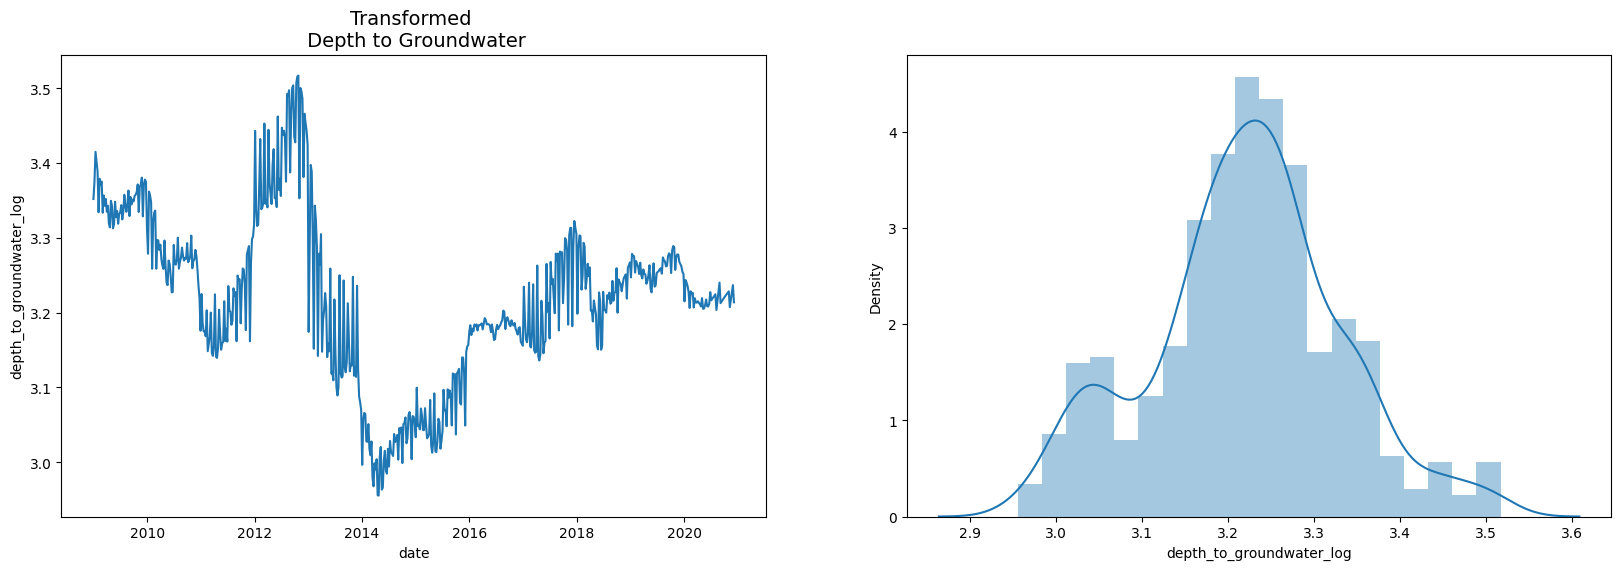

In [174]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['depth_to_groundwater_log'] = np.log(abs(df['depth_to_groundwater']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.lineplot(x = df.date, y = df['depth_to_groundwater_log'], ax = ax[0])
ax[0].set_title('Transformed \n Depth to Groundwater', fontsize=14)

sns.distplot(df['depth_to_groundwater_log'], ax=ax[1])

Differencing can be done in different orders:

First order differencing: linear trends with  

Second-order differencing: quadratic trends with  

and so on...

In [175]:
# First Order Differencing
diff = np.diff(df['depth_to_groundwater'])
df['depth_to_groundwater_diff_1'] = np.append([0], diff)

<Axes: >

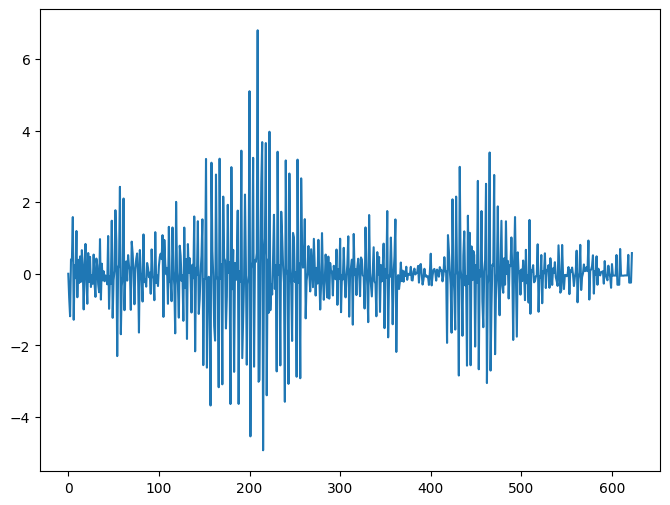

In [176]:
df['depth_to_groundwater_diff_1'].plot(figsize=(8,6))

As we can see from the above chart our column is stationary now.

**Decomposition**

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:


*   Level: The average value in the series.
*   Trend: The increasing or decreasing value in the series.
*   Seasonality: The repeating short-term cycle in the series.
*   Noise: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The *trend* and *seasonality* components are optional.

In [177]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume',
    'river_hydrometry', 'depth_to_groundwater'
]

data  = df.dropna()

for column in core_columns:
    decomp = seasonal_decompose(data[column], period=52, model='additive', extrapolate_trend='freq')
    data[f"{column}_trend"] = decomp.trend
    data[f"{column}_seasonal"] = decomp.seasonal

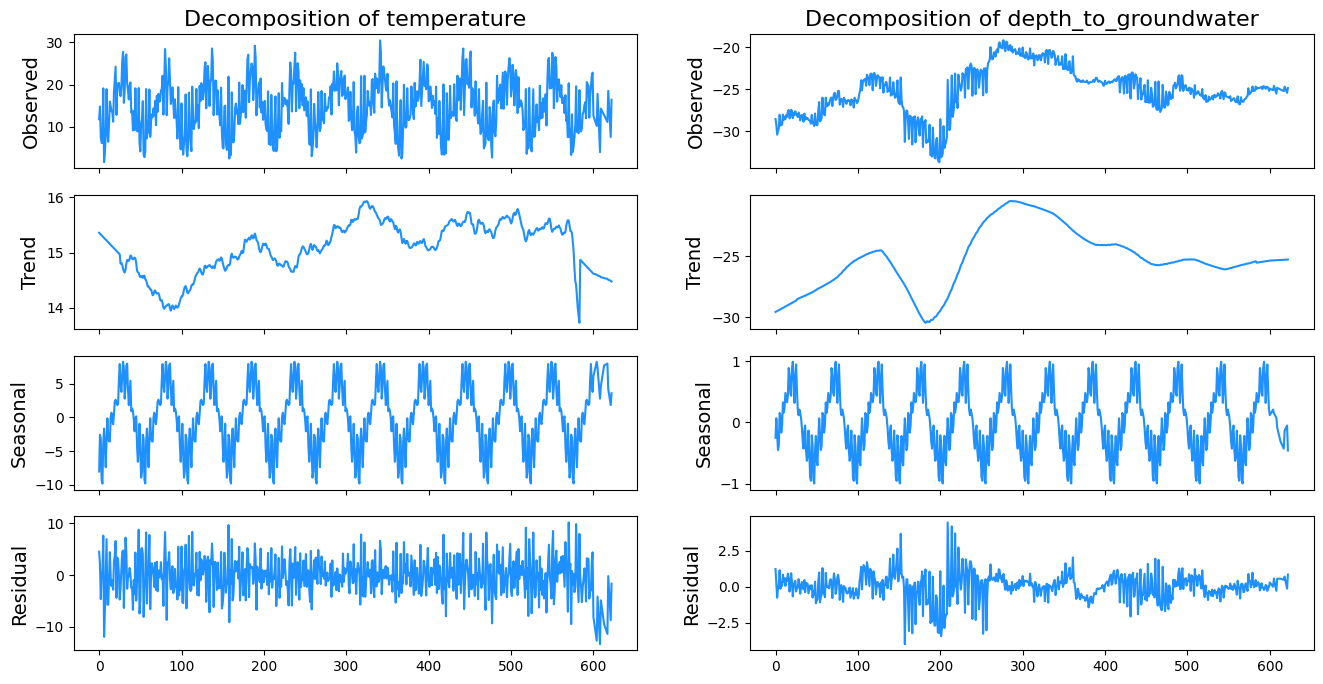

In [178]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['temperature', 'depth_to_groundwater']):

    res = seasonal_decompose(data[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)

    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

**Lag**

We want to calculate each variable with a shift() (lag) to compare the correlationwith the other variables.
Then, we are going to plot the data and try to extract some insights.

In [179]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[{column}].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[{column}].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[{column}].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[{column}].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[{column}].shift(3 * weeks_in_month)

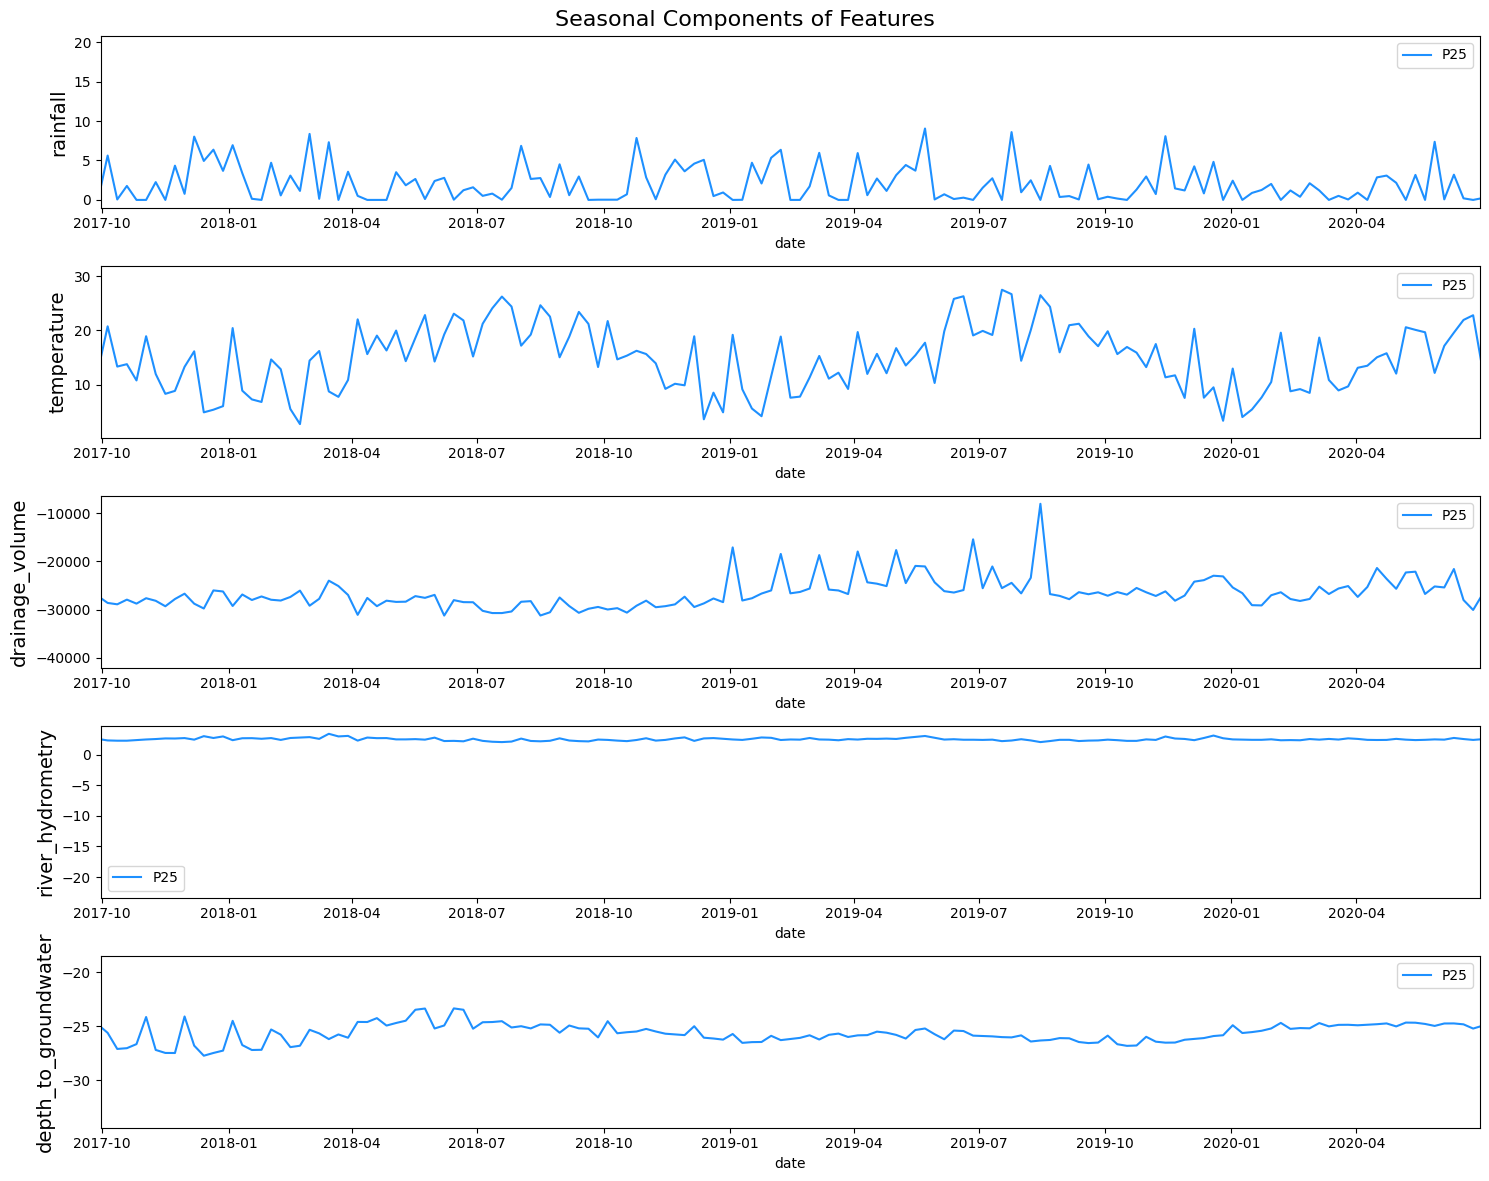

In [180]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

As we can seen:

*   **depth_to_groundwater**: reaches its maximum around May/June and its minimum around November
*   **temperature**: reaches its maxmium around August and its minimum around January
*   **drainage_volume**: reaches its minimum around July.





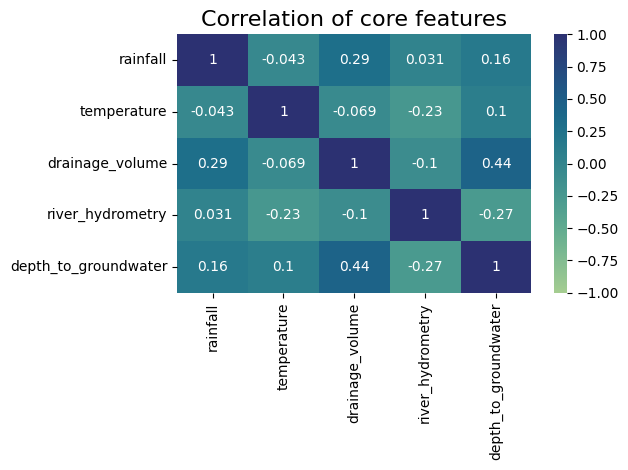

In [182]:
corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='crest')
plt.title('Correlation of core features', fontsize=16)

plt.tight_layout()
plt.show()

**Autocorrelation Analysis**

Autocorrelation, often denoted as ACF (Autocorrelation Function), and Partial Autocorrelation Function (PACF) are statistical tools used in time series analysis to understand and analyze the patterns and dependencies within a time series dataset. They help in identifying the presence of serial correlation, which is the correlation between a time series and its lagged versions (previous time points). Here's a brief explanation of each:



1.   Autocorrelation Function (ACF):
  *   *Definition:* ACF measures the correlation between a time series and its lagged values at different time intervals.
  *   *Purpose:* It helps to identify the underlying patterns or trends in the time series. A strong autocorrelation at a particular lag indicates that the current value of the time series depends on its past values up to that lag.
  *   *Interpretation:*
      *   If ACF at lag 1 is high, it suggests a strong linear relationship between the current value and the previous value.
      *   If ACF shows periodicity (e.g., every 12 lags), it might indicate a seasonal pattern in the data.
      *   If ACF drops off quickly after a few lags, it suggests that most of the information in the series is contained within those lags.



2.  Partial Autocorrelation Function (PACF):
  *   Definition: PACF measures the correlation between a time series and its lagged values after removing the linear dependence of the series on the intervening lags.
  *   Purpose: PACF helps in identifying the order of an autoregressive (AR) model. An AR model represents the current value as a linear combination of its past values. PACF helps to identify the number of past values that directly influence the current value, effectively showing the "pure" correlation.
  *   Interpretation:
      *   A significant PACF value at lag k indicates that there's a direct relationship between the current value and the value k time units ago.
      *   Non-significant PACF values at lags beyond the identified order suggest that those lags do not contribute significantly to predicting the current value.





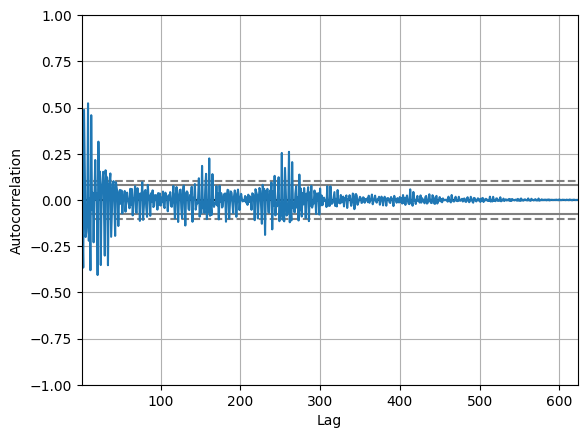

In [183]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['depth_to_groundwater_diff_1'])
plt.show()

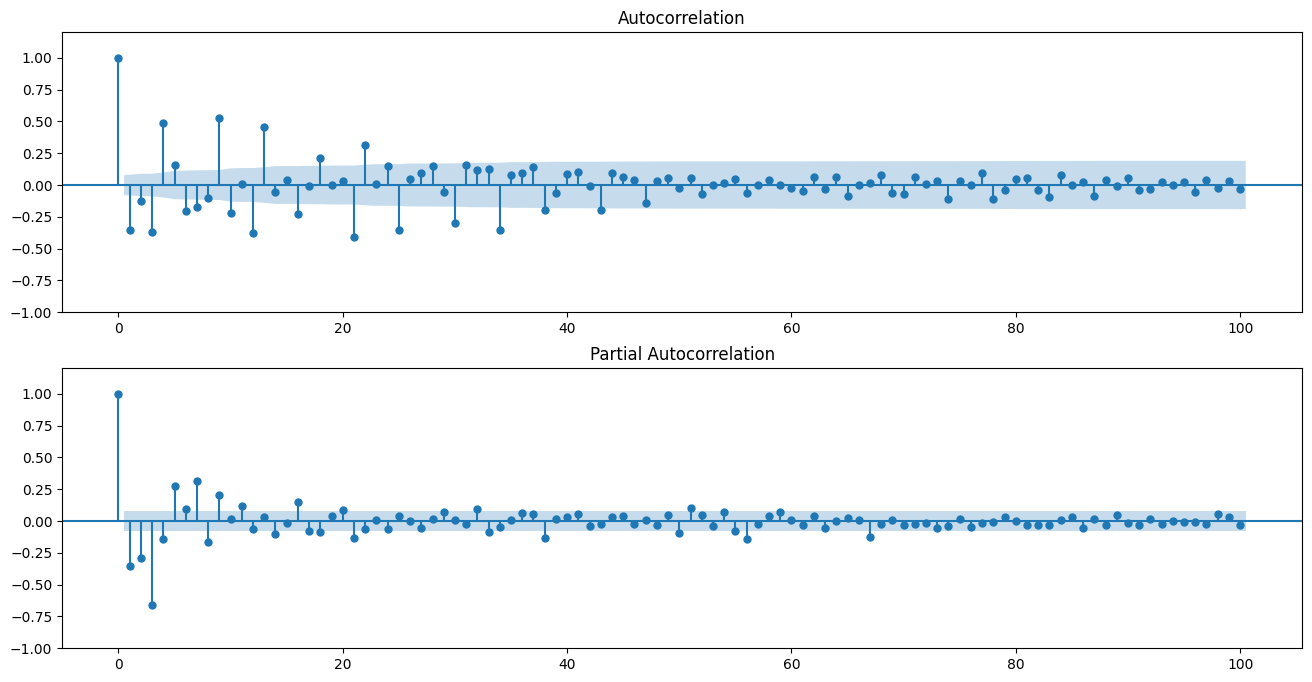

In [184]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])
ax[0].set_ylim(-1, 1.2)
ax[1].set_ylim(-1, 1.2)
plt.show()

**Train and Test Split**

In [185]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

529 94


**Cross Validation**

Model Training and Evaluation: You train and evaluate your model on each fold. Since the data in each fold is sequential, this helps simulate a more realistic scenario where you train on past data and test on future data.

Repeat: You can repeat this process for each fold, allowing you to assess how well your model generalizes to unseen future data. The performance metrics from each fold can be aggregated to get an overall measure of model performance.

In [201]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['date']
y = df['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

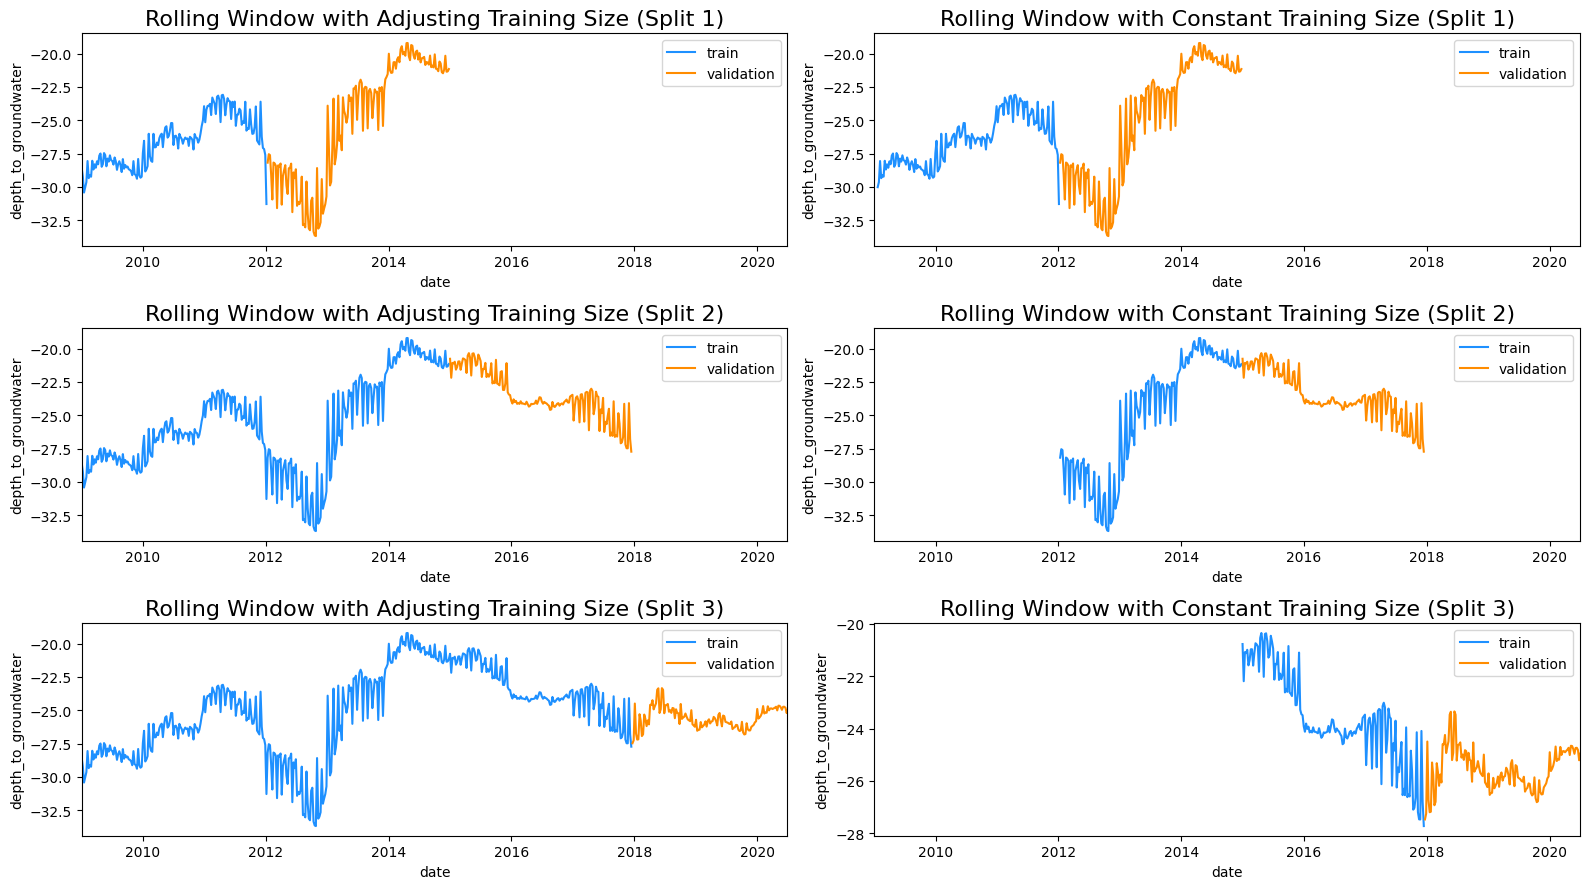

In [202]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train,
        y=y_train,
        ax=ax[i,0],
        color='dodgerblue',
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        ax=ax[i,1],
        color='dodgerblue',
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

**Modelling**

Time series can be either univariate or multivariate:

*   Univariate time series only has a single time-dependent variable.
*   Multivariate time series have a multiple time-dependent variable.

Our example originally is a multivariate time series because its has multiple features that are all time-dependent. However, by only looking at the target variable *Depth to Groundwater* we can convert it to a univariate time series.

We will evaluate the Mean Absolute Error (MAE) and the Root Mean Square Error (RMSE) of the models. For metrics are better the smaller they are.

**Prophet**

The first model (which also can handle multivariate problems) we are going to try is Facebook Prophet.

Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from prophet import Prophet

In [187]:
# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1zf8kgp/gux2h7is.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1zf8kgp/9ba9arcl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61289', 'data', 'file=/tmp/tmpp1zf8kgp/gux2h7is.json', 'init=/tmp/tmpp1zf8kgp/9ba9arcl.json', 'output', 'file=/tmp/tmpp1zf8kgp/prophet_model3vu51xsr/prophet_model-20240309003012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [188]:
print('RMSE: {}'.format(score_rmse))
print('MAE: {}'.format(score_mae))

RMSE: 1.5420012361144895
MAE: 1.2373973862599126


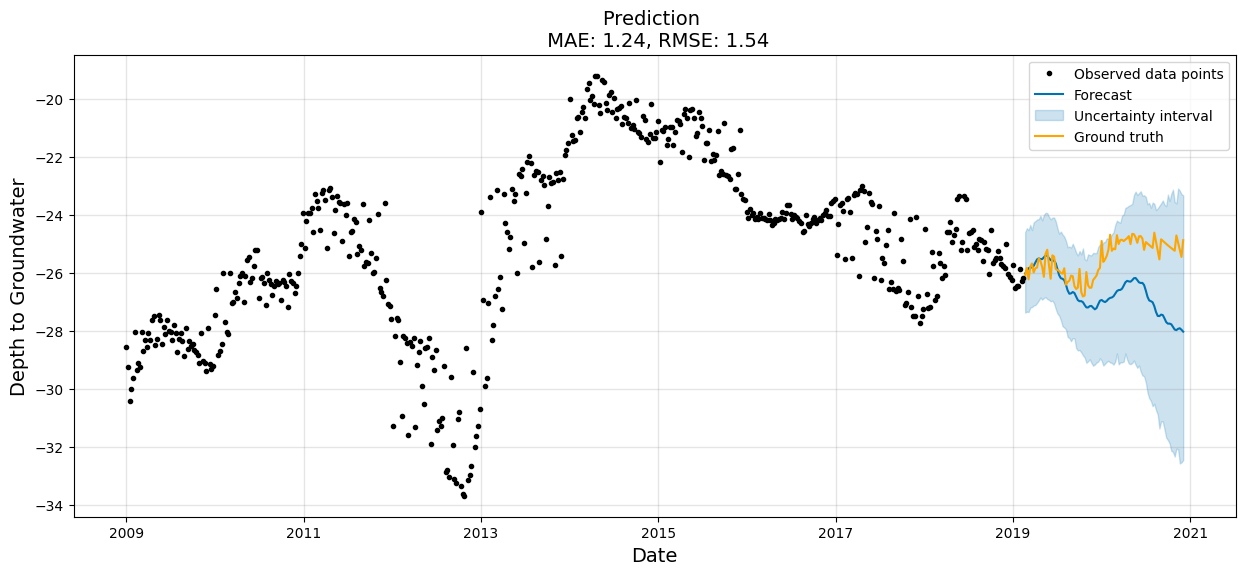

In [189]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

**1.2 ARIMA**

The Auto-Regressive Integrated Moving Average (ARIMA) model describes the autocorrelations in the data. The model assumes that the time-series is stationary. It consists of three main parts:

1.   p: Lag order (reference PACF in Autocorrelation Analysis)
2.   d: Degree of differencing. (reference Differencing in Stationarity)
3.   q: Order of moving average (check out ACF in Autocorrelation Analysis)

*Steps to analyze ARIMA  *

1.   *Check stationarity:* If a time series has a trend or seasonality component, it must be made stationary before we can use ARIMA to forecast.
2.   Difference: If the time series is not stationary, it needs to be stationarized through differencing. Take the first difference, then check for stationarity. Take as many differences as it takes. Make sure you check seasonal differencing as well.
3.   Filter out a validation sample: This will be used to validate how accurate our model is. Use train test validation split to achieve this
4.   Select AR and MA terms: Use the ACF and PACF to decide whether to include an AR term(s), MA term(s), or both.
5.   Build the model: Build the model and set the number of periods to forecast to N (depends on your needs).
6.   Validate model: Compare the predicted values to the actuals in the validation sample.

In [190]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred = model_fit.forecast(94, 90)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))
print('MAE: {}'.format(score_mae))
model_fit.summary()

RMSE: 0.9138188382174358
MAE: 0.7739767755202263


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  529
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -769.650
Date:                Sat, 09 Mar 2024   AIC                           1545.300
Time:                        00:30:23   BIC                           1558.107
Sample:                             0   HQIC                          1550.314
                                - 529                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0157      0.062      0.254      0.799      -0.105       0.136
ma.L1         -0.6921      0.041    -16.723      0.000      -0.773      -0.611
sigma2         1.0792      0.032     33.784      0.000       1.017       1.142
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1171.77
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.83
Prob(H) (two-sided):                  0.16   Kurtosis:                        10.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

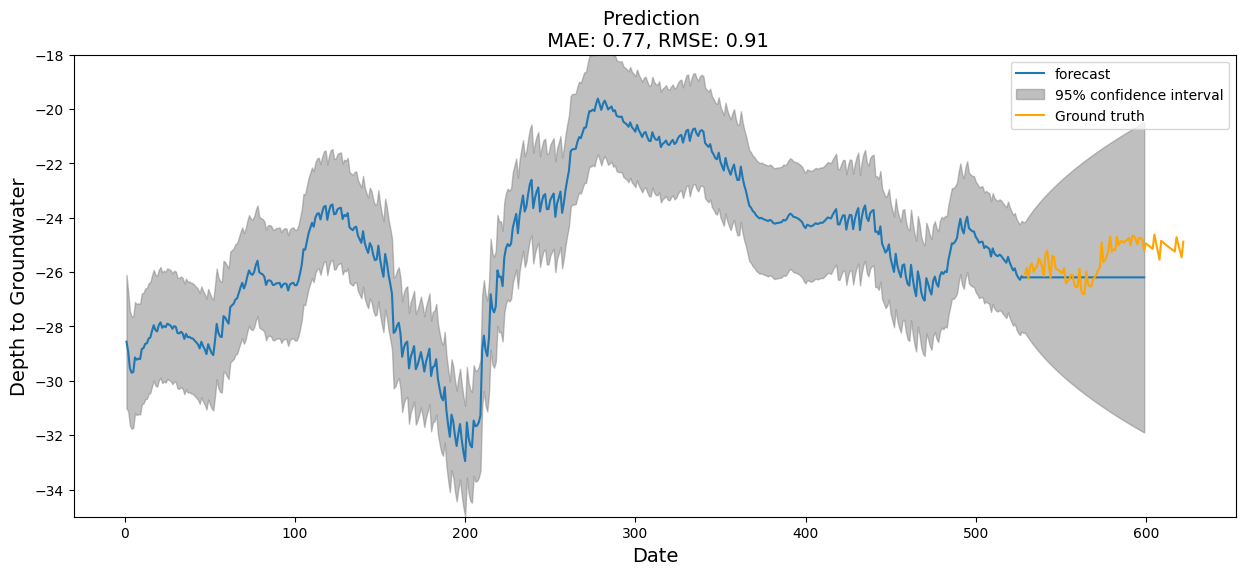

In [192]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

plot_predict(model_fit,start =1, end = 599, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

ax.set_ylim(-35, -18)
plt.show()

**1.3 - Auto-ARIMA**

AutoARIMA is a statistical modeling technique for time series forecasting that automates the process of selecting the order of an ARIMA (AutoRegressive Integrated Moving Average) model. The ARIMA model is a powerful and widely used method for forecasting time series data, but selecting the appropriate model order (p, d, q) can be a challenging and time-consuming task.

In [ ]:
#!pip install pmdarima

In [193]:
import pmdarima as pm

# Use the auto_arima function to automatically select the best ARIMA model
model = pm.auto_arima(
    y_train,               # Training data
    start_p=1,             # Start range for the AR component order (p)
    start_q=1,             # Start range for the MA component order (q)
    test='adf',            # Use the Augmented Dickey-Fuller test for differencing order (d)
    max_p=3,               # Maximum AR component order (p)
    max_q=3,               # Maximum MA component order (q)
    m=1,                   # Seasonality (set to 1 for non-seasonal time series)
    d=None,                # Differencing order (AutoARIMA will select this)
    seasonal=False,        # Set to False for non-seasonal time series
    start_P=0,             # Start range for seasonal AR component order (P)
    D=0,                   # Seasonal differencing order (AutoARIMA will select this)
    trace=True,            # Print diagnostic information during the modeling process
    error_action='ignore', # Ignore errors to continue if modeling encounters issues
    suppress_warnings=True, # Suppress warning messages
    stepwise=True           # Use a stepwise approach to explore model possibilities
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1547.135, Time=1.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1741.989, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1672.184, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1545.224, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1739.996, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1547.010, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1547.904, Time=0.78 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1543.390, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1545.300, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1545.175, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1670.200, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1546.069, Time=0.55 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 5.317 seconds
                               SARIMAX Results                                
Dep. Vari

In [194]:
# Fit model
model_fit = model.fit(y_train, order=(1,1,1))

# Prediction with ARIMA
y_pred = model_fit.predict(94, 10)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))
print('MAE: {}'.format(score_mae))

RMSE: 0.9146542146751206
MAE: 0.7747341325727144


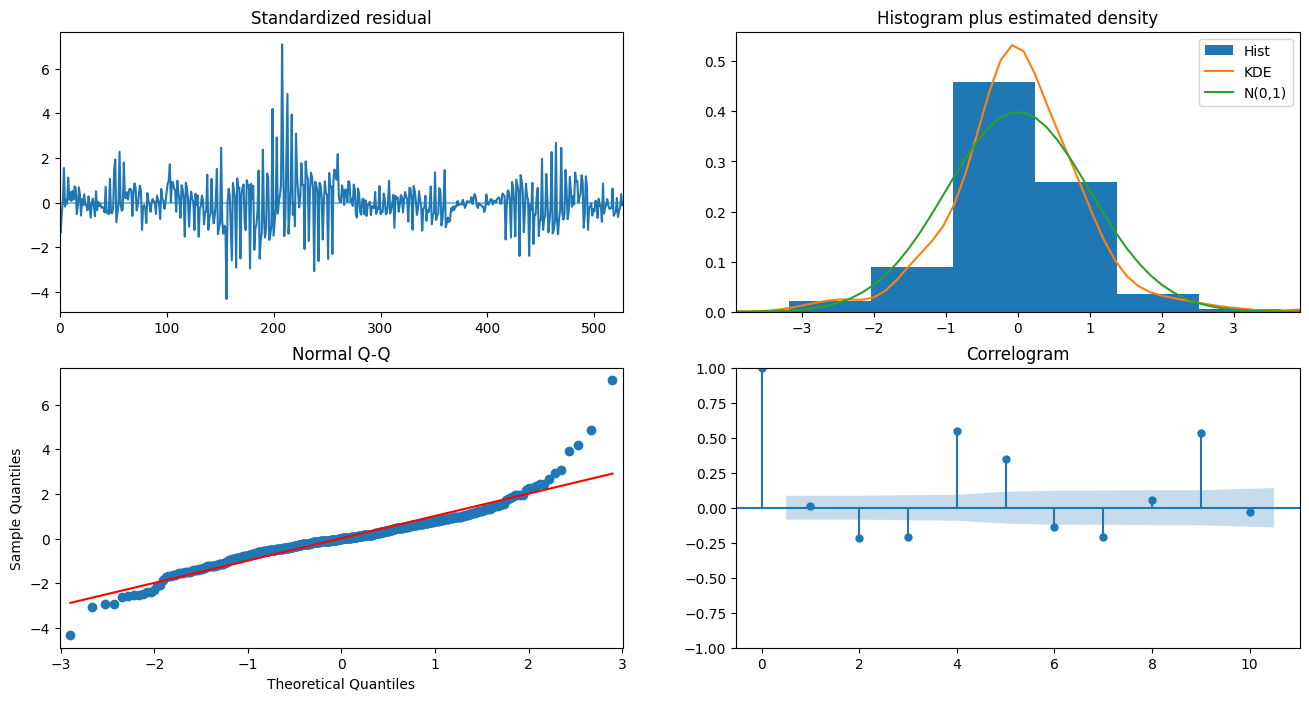

In [195]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

The *model.plot_diagnostics()* function generates four key diagnostic plots for assessing an ARIMA model:

1.   Time Series Plot with Residuals: This plot shows the residuals over time. Ideally, residuals should look like white noise, indicating that the model captures the underlying patterns.
2.   Histogram Plus Estimated Density: This plot displays the distribution of residuals. It helps assess whether they approximately follow a normal distribution, a common assumption in statistical modeling.
1.   Quantile-Quantile (Q-Q) Plot: This plot compares the quantiles of residuals to those of a theoretical normal distribution. If points align with the diagonal line, it suggests residuals are close to normal
2.   Correlogram of Residuals: This plot shows autocorrelation in residuals. Lack of significant autocorrelation is desired; it indicates that the model captures time-dependent patterns.

Interpreting these plots helps evaluate if the ARIMA model is suitable for the time series data. Look for patterns, normality in residuals, and any remaining autocorrelation. Adjustments may be needed if issues are identified.

*This proves that for our given data (1,1,1) is the best configuration for (p,q,d) of our ARIMA model.*

In [ ]:
#!pip install fbprophet

In [ ]:
#!pip install prophet

**LSTM**

We are going to use a multi-layered LSTM recurrent neural network to predict the last value of a sequence of values.

The following data pre-processing and feature engineering need to be done before construct the LSTM model:

1.   Create the dataset, ensure all data is float.
2.   Normalize the features.
1.   Split into training and test sets.
2.   Convert an array of values into a dataset matrix.
1.   Reshape into X=t and Y=t+1
2.   Reshape input to be 3D (num_samples, num_timesteps, num_features)

In [196]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.64600197],
       [-0.69249753],
       [-0.7745311 ],
       [-0.74679171],
       [-0.7207305 ],
       [-0.61135242],
       [-0.70009872],
       [-0.68410661],
       [-0.69259625],
       [-0.6100691 ]])

In [197]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

425 94


In [198]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
425/425 [==============================] - 10s 8ms/step - loss: 0.0166 - val_loss: 0.0080
Epoch 2/5
425/425 [==============================] - 2s 6ms/step - loss: 0.0083 - val_loss: 6.7914e-04
Epoch 3/5
425/425 [==============================] - 3s 7ms/step - loss: 0.0075 - val_loss: 9.1616e-04
Epoch 4/5
425/425 [==============================] - 3s 7ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 5/5
425/425 [==============================] - 2s 6ms/step - loss: 0.0058 - val_loss: 9.8777e-04
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 128)            92672     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
        

In [199]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print('RMSE: {}'.format(score_rmse))
print('MAE: {}'.format(score_mae))

3/3 [==============================] - 0s 5ms/step
RMSE: 0.4548196970026224
MAE: 0.3908846915665366


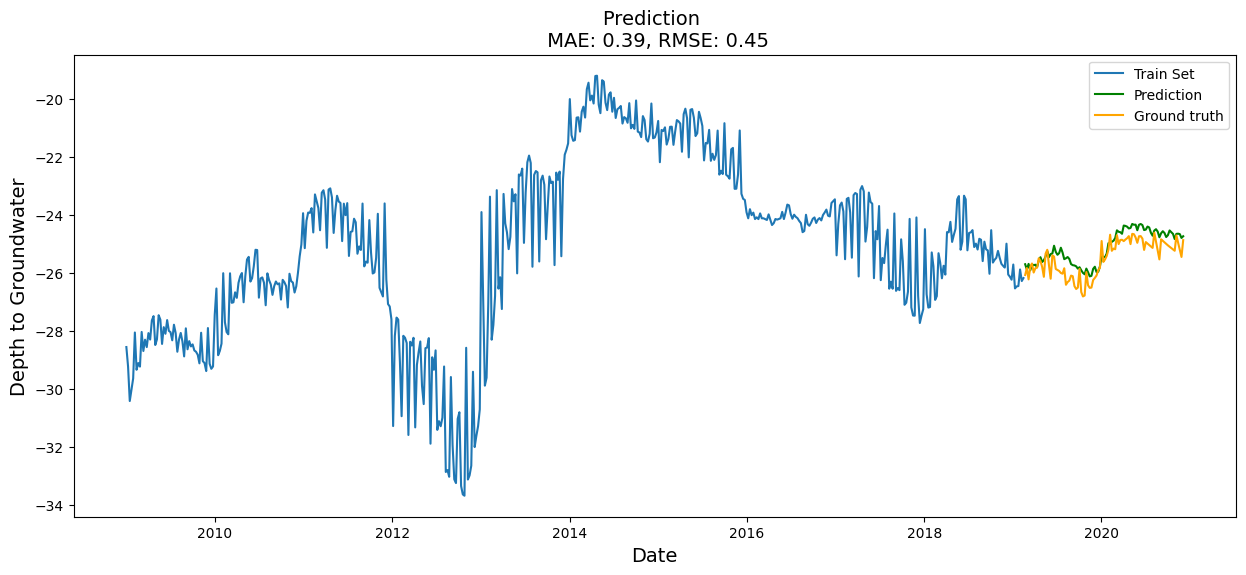

In [200]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

plt.show()

**Conclusion**

*In conclusion, this comprehensive guide to time series analysis has covered key aspects from data visualization and preprocessing to advanced modeling techniques.

  *   We've explored methods for handling missing data
  *   Achieving stationarity
  *   Conducting critical tests like the ADF test.
  *   Transformations, feature engineering, and encoding cyclic features have been discussed to enhance model performance.
  *   Time series decomposition
  *   Lag analysis
  *   Partial Autocorrelation and Autocorrelation exploration have been instrumental in understanding data patterns.

We've also delved into both univariate and multivariate modeling approaches, including the use of Prophet,ARIMA and LSTM models.

At the end we've discovered that the best models is LSTM(with MAE = 0.39 and RMSE = 0.45) for this analysis.